In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando datos

In [2]:
dataset = pd.read_csv("dataset.csv", delimiter=';')
dataset

,area,material,condicion,anio_construccion,anio_remodelacion,sotano,calefaccion,aire_acondicionado,area_construida_piso_1,area_construida_piso_2,...,banios,banios_sin_ducha,dormitorios,cocinas,chimeneas,area_garage,area_piscina,mes_venta,anio_venta,precio
0,8450,7,5,2003,2003,Gd,GasA,Y,856,854,...,2,1,3,1,0,548,0,2,2008,208500
1,9600,6,8,1976,1976,Gd,GasA,Y,1262,0,...,2,0,3,1,1,460,0,5,2007,181500
2,11250,7,5,2001,2002,Gd,GasA,Y,920,866,...,2,1,3,1,1,608,0,9,2008,223500
3,9550,7,5,1915,1970,TA,GasA,Y,961,756,...,1,0,3,1,1,642,0,2,2006,140000
4,14260,8,5,2000,2000,Gd,GasA,Y,1145,1053,...,2,1,4,1,1,836,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,Gd,GasA,Y,953,694,...,2,1,3,1,1,460,0,8,2007,175000
1456,13175,6,6,1978,1988,Gd,GasA,Y,2073,0,...,2,0,3,1,2,500,0,2,2010,210000
1457,9042,7,9,1941,2006,TA,GasA,Y,1188,1152,...,2,0,4,1,2,252,0,5,2010,266500
1458,9717,5,6,1950,1996,TA,GasA,Y,1078,0,...,1,0,2,1,0,240,0,4,2010,142125


## Visualizacion de datos

<AxesSubplot:xlabel='area', ylabel='precio'>

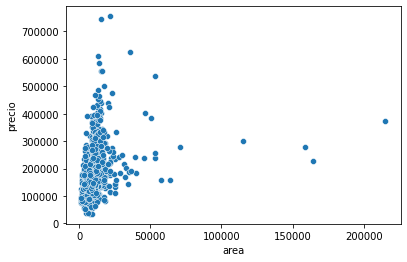

In [3]:
sns.scatterplot(x = 'area', y='precio', data = dataset)

## Verificar la correlacion

<AxesSubplot:>

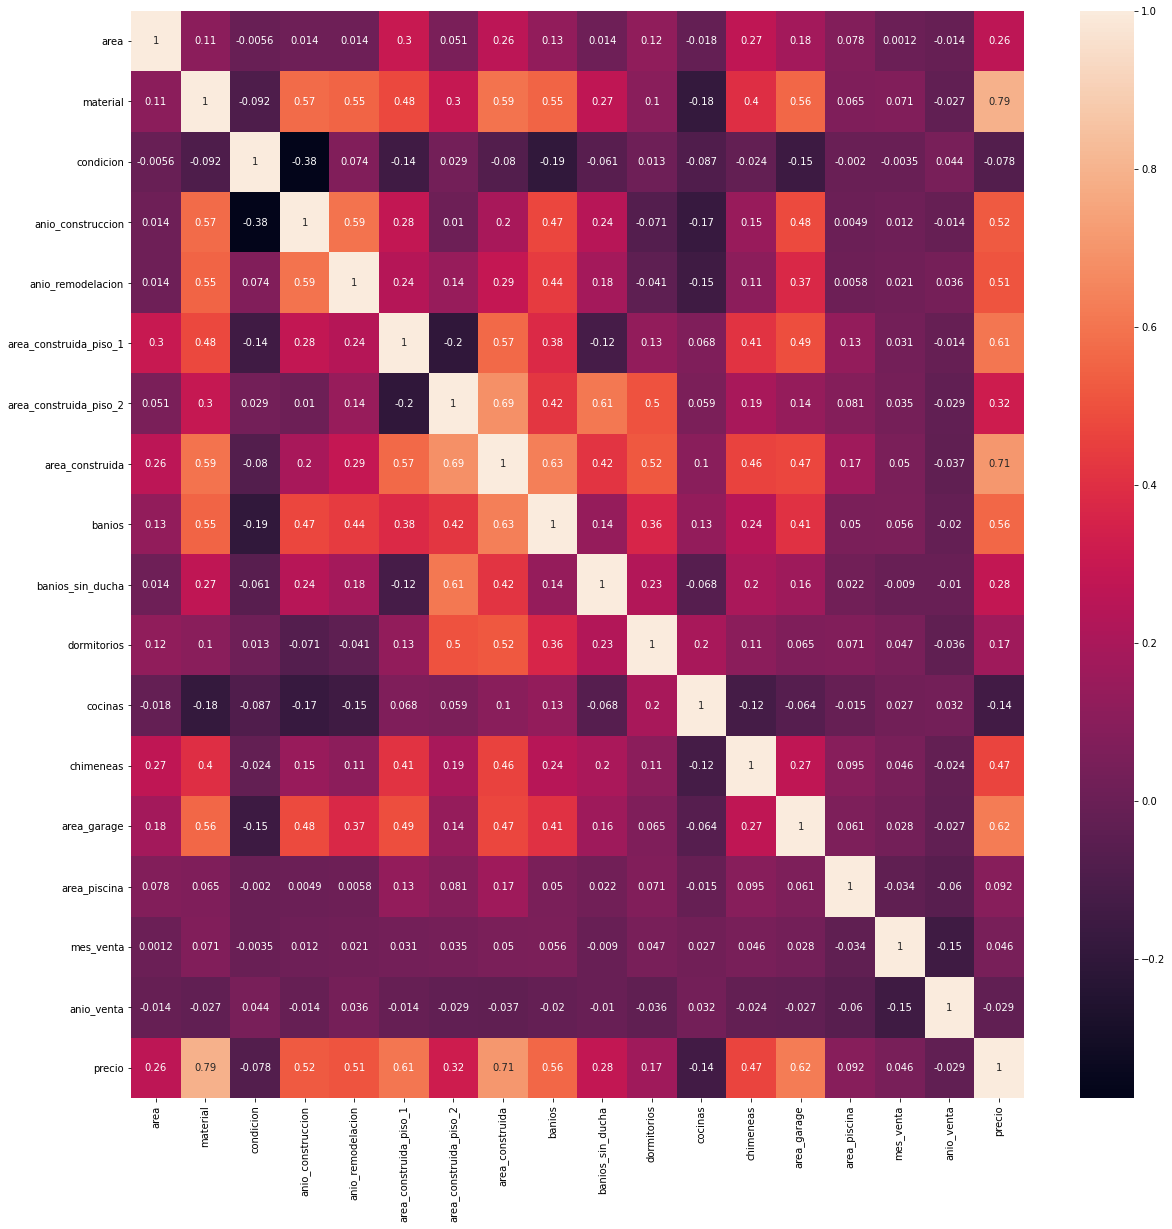

In [4]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(dataset.corr(), annot=True)

## Limpieza de datos

In [5]:
features = ['area', 'material', 'anio_construccion', 'anio_remodelacion', 'area_construida_piso_1', 'area_construida', 'banios', 'chimeneas', 'area_garage']

X = dataset[features]
Y = dataset['precio']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.0334198 , 0.66666667, 0.94927536, ..., 0.66666667, 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.75362319, ..., 0.66666667, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.93478261, ..., 0.66666667, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 0.5       , ..., 0.66666667, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.56521739, ..., 0.33333333, 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.67391304, ..., 0.33333333, 0.        ,
        0.19464034]])

## Normalizando output

In [6]:
Y = Y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(Y)
y_scaled

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

## Entrenamiento

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_text, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.3)

## Definiendo modelo

In [8]:
model = tf.keras.models.Sequential()
# Capa de entrada
# 100 neuronas, funcion de activacion relu, 9 datos de input
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(9, )))
# 2 Capas ocultas
# 100 neuronas, funcion de activacion relu
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
# Capa de salida
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
# model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, Y_train, batch_size=50, epochs=100, validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 7ms/step - loss: 0.0147 - val_loss: 0.0062
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0043
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 11/

## Evaluar el modelo

In [9]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

## Gráfico

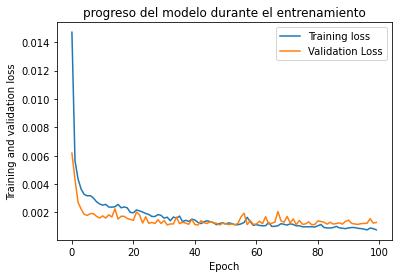

In [10]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('progreso del modelo durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation Loss'])

## Prediccion

In [11]:
# Inputs
# ['area', 'material', 'anio_construccion', 'anio_remodelacion', 'area_construida_piso_1', 'area_construida', 'banios', 'chimeneas', 'area_garage']
X_test_1 = np.array([[14859, 7, 2006, 2006, 1670, 1670, 2, 1, 690]])
scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

# Prediccion
Y_predict_1 = model.predict(X_test_scaled_1)
Y_predict_1
# Revertir escalado
Y_predict_1 = scaler.inverse_transform(Y_predict_1)
Y_predict_1

array([[55904.61]], dtype=float32)